In [1]:
import os
import sys
import json

sys.path.append(os.path.abspath('.'))
import api

def read(path):
  with open(path) as f:
    return json.loads(f.read())

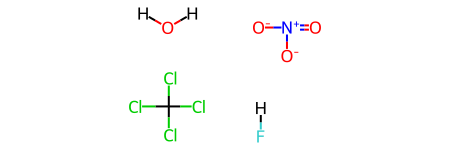

In [2]:
api.json_to_mol(read('test/author.json'))

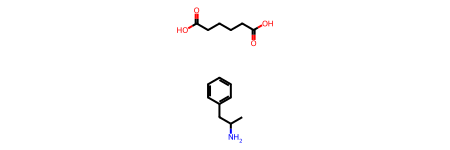

In [3]:
api.json_to_mol(read('test/new_format.json'))

In [4]:
def validate(path: str):
  return api.validate(read(path))


def compare(path1: str, path2: str, match_stereo = True):
  return api.compare(read(path1), read(path2), match_stereo)


assert validate('test/author.json')
assert not compare('test/cis.json', 'test/trans.json')
assert not compare('test/author.json', 'test/faulty2.json')
assert not compare('test/isomer1.json', 'test/isomer2.json')
assert compare('test/isomer1.json', 'test/isomer2.json', False)
assert compare('test/arrows/1.json', 'test/arrows/2.json')
assert not compare('test/arrows/1.json', 'test/arrows/3.json')
assert not compare('test/arrows/1.json', 'test/arrows/4.json')

# H-count
assert compare('test/75e47871/with_h.json', 'test/75e47871/without_h.json')

# Resonance
assert compare('test/6bae6c35/mol1.json', 'test/6bae6c35/mol2.json')

# Halogen
assert compare('test/89c1f93c/author.json', 'test/89c1f93c/submission.json')
assert not compare('test/89c1f93c/author.json', 'test/89c1f93c/invalid.json')

# Cyclic trans
assert not compare('test/4f9ead79/mol1.json', 'test/4f9ead79/mol2.json', True)